<a href="https://colab.research.google.com/github/kridtapon/ChaosVortex-Strategy/blob/main/ChaosVortex_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.5/527.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate the Vortex Indicator (VI+ and VI-)
def calculate_vortex(data, period):
    """
    Calculate the Vortex Indicator (VI+ and VI-).
    """
    high_diff = data['High'].diff()
    low_diff = data['Low'].diff()

    # True range
    tr = pd.concat([data['High'] - data['Low'],
                    (data['High'] - data['Close'].shift()).abs(),
                    (data['Low'] - data['Close'].shift()).abs()], axis=1).max(axis=1)

    # Vortex Indicator (+ and -)
    vi_plus = (high_diff.where(high_diff > 0, 0).rolling(window=period).sum() / tr.rolling(window=period).sum()) * 100
    vi_minus = (low_diff.where(low_diff > 0, 0).rolling(window=period).sum() / tr.rolling(window=period).sum()) * 100
    return vi_plus, vi_minus

# Function to calculate Fractal Chaos Bands (Upper Band and Lower Band)
def calculate_fractal_bands(data, period):
    """
    Calculate Fractal Chaos Bands (Upper Band and Lower Band).
    """
    upper_band = data['Close'].rolling(window=period).max()
    lower_band = data['Close'].rolling(window=period).min()
    return upper_band, lower_band

# Define the stock symbol and time period
symbol = 'FICO'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Calculate indicators
vortex_period = 15
fractal_period = 10

# Calculate Vortex Indicator (VI+ and VI-)
df['VI+'], df['VI-'] = calculate_vortex(df, vortex_period)

# Calculate Fractal Chaos Bands (Upper and Lower Bands)
df['UB'], df['LB'] = calculate_fractal_bands(df, fractal_period)

# Define Entry and Exit signals based on the conditions
df['Entry'] = (df['Close'] < df['UB']) & (df['VI+'] > df['VI-'])
df['Exit'] = (df['Close'] > df['LB']) & (df['VI-'] > df['VI+'])

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           542281.151169
Total Return [%]                       442.281151
Benchmark Return [%]                   419.933663
Max Gross Exposure [%]                      100.0
Total Fees Paid                      31497.426357
Max Drawdown [%]                        18.402436
Max Drawdown Duration                        94.0
Total Trades                                   64
Total Closed Trades                            64
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                               71.875
Best Trade [%]                          37.670779
Worst Trade [%]                         -7.245722
Avg Winning Trade [%]                    4.807449
Avg Losing Trade [%]                    -2.089907


In [ ]:
df_holding = df['Close']
pf = vbt.Portfolio.from_holding(df_holding, init_cash=100_000)
pf.stats()

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



,Close
Start,2020-01-02 00:00:00
End,2024-12-31 00:00:00
Period,1258
Start Value,100000.0
End Value,519933.663401
Total Return [%],419.933663
Benchmark Return [%],419.933663
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],50.900922


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: 

Best Vortex Period: 15
Best Fractal Period: 10
Best Portfolio Final Value: 442.28115116865104


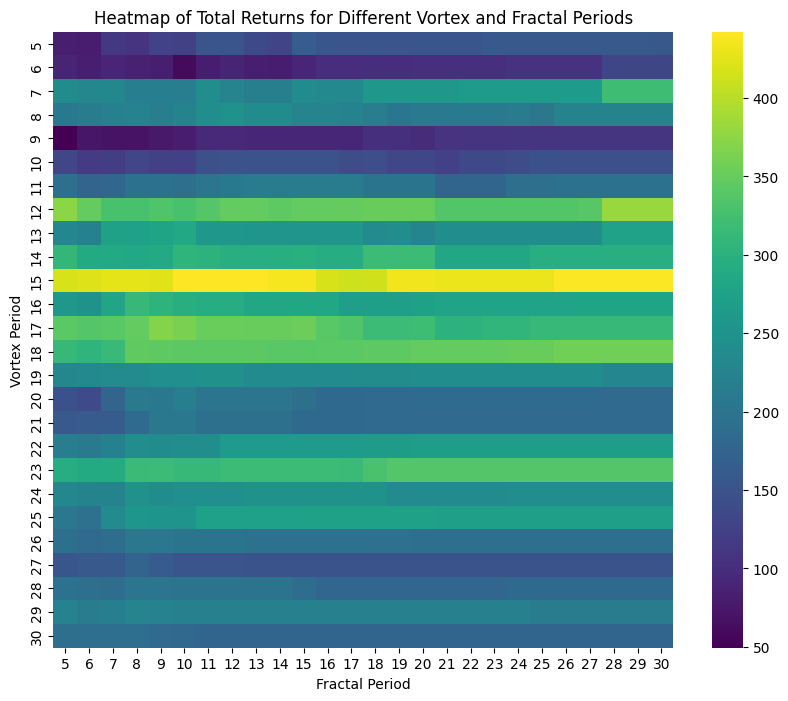

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate the Vortex Indicator (VI+ and VI-)
def calculate_vortex(data, period):
    high_diff = data['High'].diff()
    low_diff = data['Low'].diff()

    # True range
    tr = pd.concat([data['High'] - data['Low'],
                    (data['High'] - data['Close'].shift()).abs(),
                    (data['Low'] - data['Close'].shift()).abs()], axis=1).max(axis=1)

    # Vortex Indicator (+ and -)
    vi_plus = (high_diff.where(high_diff > 0, 0).rolling(window=period).sum() / tr.rolling(window=period).sum()) * 100
    vi_minus = (low_diff.where(low_diff > 0, 0).rolling(window=period).sum() / tr.rolling(window=period).sum()) * 100
    return vi_plus, vi_minus

# Function to calculate Fractal Chaos Bands (Upper Band and Lower Band)
def calculate_fractal_bands(data, period):
    upper_band = data['Close'].rolling(window=period).max()
    lower_band = data['Close'].rolling(window=period).min()
    return upper_band, lower_band

# Define the stock symbol and time period
symbol = 'FICO'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Define the parameter grid for optimization
vortex_periods = range(5, 31)  # Vortex period range from 5 to 30
fractal_periods = range(5, 31)  # Fractal period range from 5 to 30
param_grid = list(ParameterGrid({'vortex_period': vortex_periods, 'fractal_period': fractal_periods}))

# Initialize a 2D array to store the total return for each parameter combination
returns_matrix = np.zeros((len(vortex_periods), len(fractal_periods)))

# Function to backtest the strategy and calculate performance
def backtest_strategy(vortex_period, fractal_period):
    # Calculate Vortex Indicator (VI+ and VI-)
    df['VI+'], df['VI-'] = calculate_vortex(df, vortex_period)

    # Calculate Fractal Chaos Bands (Upper and Lower Bands)
    df['UB'], df['LB'] = calculate_fractal_bands(df, fractal_period)

    # Define Entry and Exit signals based on the conditions
    df['Entry'] = (df['Close'] < df['UB']) & (df['VI+'] > df['VI-'])
    df['Exit'] = (df['Close'] > df['LB']) & (df['VI-'] > df['VI+'])

    # Filter data for the test period (2020-2025)
    df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_test['Close'],
        entries=df_test['Entry'],
        exits=df_test['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Return the final portfolio value
    return portfolio.stats()['Total Return [%]']

# Perform the optimization over the parameter grid and fill the returns_matrix
best_params = None
best_value = -np.inf

for i, params in enumerate(param_grid):
    vortex_period = params['vortex_period']
    fractal_period = params['fractal_period']

    total_return = backtest_strategy(vortex_period, fractal_period)

    # Store the return in the matrix
    vortex_idx = vortex_period - vortex_periods.start  # Find the index for the vortex period
    fractal_idx = fractal_period - fractal_periods.start  # Find the index for the fractal period
    returns_matrix[vortex_idx, fractal_idx] = total_return

    if total_return > best_value:
        best_value = total_return
        best_params = params

# Output the best parameters and the corresponding portfolio performance
print("Best Vortex Period:", best_params['vortex_period'])
print("Best Fractal Period:", best_params['fractal_period'])
print("Best Portfolio Final Value:", best_value)

# Plot the heatmap of the total returns for each parameter combination
plt.figure(figsize=(10, 8))
sns.heatmap(returns_matrix, annot=False, fmt=".2f", cmap="viridis", xticklabels=fractal_periods, yticklabels=vortex_periods)
plt.title("Heatmap of Total Returns for Different Vortex and Fractal Periods")
plt.xlabel("Fractal Period")
plt.ylabel("Vortex Period")
plt.show()


In [1]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.9 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


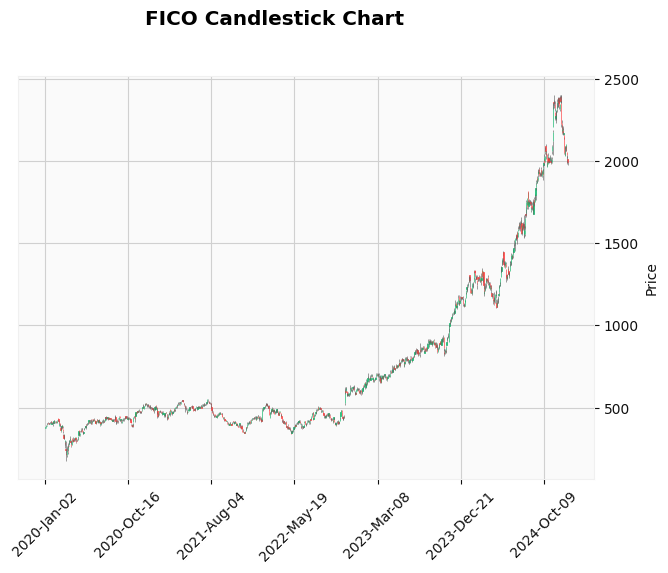

In [4]:
import yfinance as yf
import mplfinance as mpf

# Define the stock symbol and time period
symbol = 'FICO'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Rename columns to match mplfinance requirements
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Fill any missing data
df.ffill(inplace=True)

# Plot the candlestick chart
mpf.plot(df, type='candle', volume=False, title=f"{symbol} Candlestick Chart", style='yahoo')


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


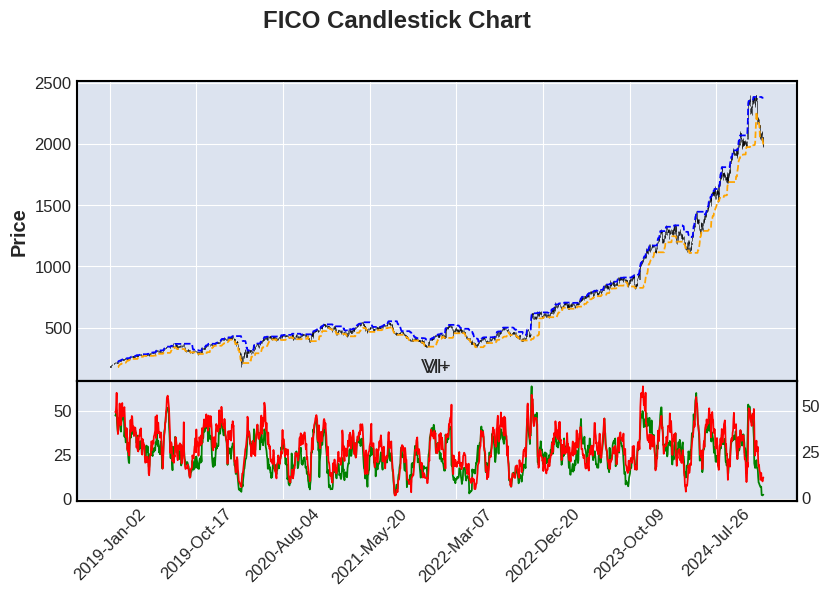

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

# Function to calculate the Vortex Indicator (VI+ and VI-)
def calculate_vortex(data, period):
    """
    Calculate the Vortex Indicator (VI+ and VI-).
    """
    high_diff = data['High'].diff()
    low_diff = data['Low'].diff()

    # True range
    tr = pd.concat([data['High'] - data['Low'],
                    (data['High'] - data['Close'].shift()).abs(),
                    (data['Low'] - data['Close'].shift()).abs()], axis=1).max(axis=1)

    # Vortex Indicator (+ and -)
    vi_plus = (high_diff.where(high_diff > 0, 0).rolling(window=period).sum() / tr.rolling(window=period).sum()) * 100
    vi_minus = (low_diff.where(low_diff > 0, 0).rolling(window=period).sum() / tr.rolling(window=period).sum()) * 100
    return vi_plus, vi_minus

# Function to calculate Fractal Chaos Bands (Upper Band and Lower Band)
def calculate_fractal_bands(data, period):
    """
    Calculate Fractal Chaos Bands (Upper Band and Lower Band).
    """
    upper_band = data['Close'].rolling(window=period).max()
    lower_band = data['Close'].rolling(window=period).min()
    return upper_band, lower_band

# Define the stock symbol and time period
symbol = 'FICO'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Parameters for indicators
vortex_period = 14
fractal_period = 20

# Calculate Vortex Indicator
vi_plus, vi_minus = calculate_vortex(df, vortex_period)

# Calculate Fractal Chaos Bands
upper_band, lower_band = calculate_fractal_bands(df, fractal_period)

# Plot Candlestick Chart with Vortex and Fractal Bands

# Create candlestick chart using mplfinance
mpf.plot(df, type='candle', title=f'{symbol} Candlestick Chart', ylabel='Price',
         addplot=[
             mpf.make_addplot(vi_plus, panel=1, color='green', title='VI+'),
             mpf.make_addplot(vi_minus, panel=1, color='red', title='VI-'),
             mpf.make_addplot(upper_band, panel=0, color='blue', linestyle='--'),
             mpf.make_addplot(lower_band, panel=0, color='orange', linestyle='--')
         ], figsize=(10, 6))

plt.show()
